# Research Question
### Roger McClain

The question that I will address using this data set (Medical Readmission Data set) is the question of which variables are the best predictors of a Readmission to the hospital. The readmission is defined as being readmitted to the hospital within one month of being released. In order to answer this question I will need to clean the data, so that I can ensure that accurate conclusions can be drawn. Once the data set has been cleaned I can go about seeing which variable is the most correlated with readmission, and the hospital can use this information to take extra steps to hopefully prevent the need for someone to be readmitted.

In [1]:
# The first thing I will do is import some python packages so that I can examine the data and the variables in contains
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# I will then read my dataset with the read_csv() function and save it as a DataFrame so that I can work with it
readmission_df = pd.read_csv('C:/code/D206/D206Project/medical_raw_data.csv')

In [2]:
# This code lets me have multiple outputs in one cell so that I can save some space
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# I use the .shape command to see the size of my dataset
readmission_df.shape
# This lets me know that the data set is 10,000 rows and 53 columns
readmission_df.columns
# We can see what variables each column contains, and we can look at the Data Dictionary 
# for a description of the variables

(10000, 53)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

# Variable Description

In this next section we will use a combination of the Data Dictionary and some pandas commands to examine each variable in depth. We will use a loop to create a smaller DataFrame of just the column name, the data type of the value in the column, and one example value so that we can examine this more easily. We will then be able to go through it row by row to see what each column in our main DataSet contains.

In [4]:
description_storage = []
for (columnName, columnData) in readmission_df.iteritems():
    description_storage.append(
        {
            'Name': columnName,
            'Data Type': columnData.dtype,
            'First / Example Value': columnData.values[0]
        }
    )
description = pd.DataFrame(description_storage)

In [5]:
# Our first column is 'Unnamed: 0' this appears to be an indexing column, it is not mentioned in the data dictionary, 
# we will not use the values here, but we can see that the example value is "1" as it should be, we can see it is a
# numeric variable as it is stored as 'Int64'
description.iloc[0]

Data Type                     int64
First / Example Value             1
Name                     Unnamed: 0
Name: 0, dtype: object

In [6]:
# Our second column is 'CaseOrder', this is a placeholder variable to preserve the original order in the raw data file
# not useful for our purposes, but we can see that the example value is "1" as it should be we can see it is a
# numeric variable as it is stored as 'Int64'
description.iloc[1]

Data Type                    int64
First / Example Value            1
Name                     CaseOrder
Name: 1, dtype: object

In [7]:
# Our third column is 'Customer_id', this is a unique patient ID, its Data Type is 'object', which in pandas means 
# 'string', and indeed the example value indicates that this is a string
description.iloc[2]

Data Type                     object
First / Example Value        C412403
Name                     Customer_id
Name: 2, dtype: object

In [8]:
# The fourth and fifth columns are 'Interaction' and 'UID' respectively, these columns are UniqueID's related to patient
# interactions and procedures, we can see that they are both stored as strings, with the example value backing that up
description.iloc[3]
description.iloc[4]

Data Type                                              object
First / Example Value    8cd49b13-f45a-4b47-a2bd-173ffa932c2f
Name                                              Interaction
Name: 3, dtype: object

Data Type                                          object
First / Example Value    3a83ddb66e2ae73798bdf1d705dc0932
Name                                                  UID
Name: 4, dtype: object

## Demographic Variables

In [9]:
# The next 3 columns are related to geographical data about the patient, we have 'City', 'State', and 'County', these 
# stored as string type, and the example's show that this makes sense since they are the names of places. 
description.iloc[5]
description.iloc[6]
description.iloc[7]

Data Type                object
First / Example Value       Eva
Name                       City
Name: 5, dtype: object

Data Type                object
First / Example Value        AL
Name                      State
Name: 6, dtype: object

Data Type                object
First / Example Value    Morgan
Name                     County
Name: 7, dtype: object

In [10]:
# The next 3 columns continue to be concerned with geographical demographic data for the patient, we have 'Zip', 'Lat',
# 'Lng', we can see that Zip code is stored as an int64, which is probably not the correct choice, zip codes can have 
# extensions and can also start with 0, which makes storing them as int64 potentially problematic. Latitude and 
# Longitude are stored as float64, which makes sense since they require a greater degree of precision, and the examples
# show why keeping the decimal values is useful.
description.iloc[8]
description.iloc[9]
description.iloc[10]

Data Type                int64
First / Example Value    35621
Name                       Zip
Name: 8, dtype: object

Data Type                float64
First / Example Value    34.3496
Name                         Lat
Name: 9, dtype: object

Data Type                float64
First / Example Value   -86.7251
Name                         Lng
Name: 10, dtype: object

In [11]:
# For the next 3 columns we have 'Population', which is the population within a mile radius of where the patient lives,
# this is stored as an int64 which makes sense, since there can only be whole numbers of people. The example also bears
# this out. Then we have 'Area', which is a categorical value between "rural, urban, suburban" for where the patient 
# lives, This could be potentially unstacked into 3  distinct columns if we wanted to use it in some statistical tests. 
# For now it is stored as a string and we can see that the example supports this. Finally we have 'Timezone', also as
# a string, this could also be unstacked since it is categorical, but it would create a ton of columns and would be 
# unwieldy at best, storing as a string makes sense, and we can see that in the example as well.
description.iloc[11]
description.iloc[12]
description.iloc[13]

Data Type                     int64
First / Example Value          2951
Name                     Population
Name: 11, dtype: object

Data Type                  object
First / Example Value    Suburban
Name                         Area
Name: 12, dtype: object

Data Type                         object
First / Example Value    America/Chicago
Name                            Timezone
Name: 13, dtype: object

In [12]:
# The next 3 columns are more demographic data about the patient, we have 'Job', 'Children', and 'Age'. Job is the job
# of the patient, it is stored as a string and we can see in the example that this makes sense. The 'Children' column
# is the number of children in the patient's household, maybe this column could be renamed to be more descriptive, it is
# also stored as a float64, which doesn't seem to make sense, since children only come in whole numbers, we can also see
# that the example is just a whole number. The third column is the 'Age' column, which is the patients age and as we see
# in the example it is just a whole number.
description.iloc[14]
description.iloc[15]
description.iloc[16]

Data Type                                          object
First / Example Value    Psychologist, sport and exercise
Name                                                  Job
Name: 14, dtype: object

Data Type                 float64
First / Example Value           1
Name                     Children
Name: 15, dtype: object

Data Type                float64
First / Example Value         53
Name                         Age
Name: 16, dtype: object

In [13]:
# The next 3 columns are more demographic data as well, we have 'Education', 'Employment', and 'Income', Education is 
# the highest amount of education that the patient has, and it is stored as a string. Employment is the patients 
# employment status, this is also a string and seems to make sense as well. Income is the patients Annual Income and is 
# stored as a float64, having this as a float64 makes sense and we can see that the example make use of it. 
description.iloc[17]
description.iloc[18]
description.iloc[19]

Data Type                                        object
First / Example Value    Some College, Less than 1 Year
Name                                          Education
Name: 17, dtype: object

Data Type                    object
First / Example Value     Full Time
Name                     Employment
Name: 18, dtype: object

Data Type                float64
First / Example Value    86575.9
Name                      Income
Name: 19, dtype: object

In [14]:
# The next 2 columns are the final columns having to do with patient demographic data, we have 'Marital', and 'Gender',
# Marital is the marital status of the patient, and Gender is the patients self-identified gender. These are both stored
# as string type and since they are categorical, this makes sense for now, but we may want to unstack them at some point.
# We can see that the examples make sense as string type.
description.iloc[20]
description.iloc[21]

Data Type                  object
First / Example Value    Divorced
Name                      Marital
Name: 20, dtype: object

Data Type                object
First / Example Value      Male
Name                     Gender
Name: 21, dtype: object

In [15]:
# The next column is 'ReAdmis' this column contains whether or not the patient has been readmitted to the hospital, we 
# define readmission as being readmitted within a month of release from the hospital, this is a categorical variable 
# that we may unstack later, but we can see that it is stored as a string and the example shows that as well. This is
# one of our main variables for our analysis
description.iloc[22]

Data Type                 object
First / Example Value         No
Name                     ReAdmis
Name: 22, dtype: object

In [16]:
# Our next 3 columns contain some information about the patients hospital stay, first we have 'Vitd_levels', this is 
# stored as a float64 and is the patients vitamin D levels measured in ng/ml. Next we have 'Doc_visits' this is an int64
# that measures the number of times the primary physician visited the patient during their initial hospitalization. The
# last column is "Full_meals_eaten", which is an int64 of the number of full meals the patient ate while hospitalized.
# We can see from each of the examples that the data types seem to make sense.
description.iloc[23]
description.iloc[24]
description.iloc[25]

Data Type                    float64
First / Example Value        17.8023
Name                     VitD_levels
Name: 23, dtype: object

Data Type                     int64
First / Example Value             6
Name                     Doc_visits
Name: 24, dtype: object

Data Type                           int64
First / Example Value                   0
Name                     Full_meals_eaten
Name: 25, dtype: object

In [17]:
# Our next 3 columns contain more information about the patients hospital stay as well as one about their nutrition 
# history. The first column is 'VitD_supp' which is an int64 measure of the number of times that vitamin D supplements 
# were administered to the patient. We can see that in this example the patient recieved '0'. The next column is 
# 'Soft_drink', this is a categorical variable with yes or no as possible answers and it measured whether or not patient
# habitually drinks 3 or more sodas a day, in this case or example shows a missing value, so we add a line to check
# another row and see that it is correctly a string. Lastly we have 'Initial_admin' which is stored as a string and
# shows the means by which the patient was admitted. The example shows that this patient was admitted on the 
# 'Emergency Admission' category.
description.iloc[26]
description.iloc[27]
print('Soft Drink: ',readmission_df['Soft_drink'][2])
description.iloc[28]

Data Type                    int64
First / Example Value            0
Name                     VitD_supp
Name: 26, dtype: object

Data Type                    object
First / Example Value           NaN
Name                     Soft_drink
Name: 27, dtype: object

Soft Drink:  No


Data Type                             object
First / Example Value    Emergency Admission
Name                           Initial_admin
Name: 28, dtype: object

## Patient Preexisting Conditions Variables

In [18]:
# The next group of variables all concern the patients preexisting health conditions, We have 'HighBlood', 'Stroke', 
# and 'Complication_risk', HighBlood is a string categorical variable, indicating if the patient has high blood pressure
# or not. Stroke is the same, only with whether or not the patient has had a stroke or not. As for Complication_risk 
# this is a string categorical variable as well of the level of complication risk (low, medium, high)
description.iloc[29]
description.iloc[30]
description.iloc[31]

Data Type                   object
First / Example Value          Yes
Name                     HighBlood
Name: 29, dtype: object

Data Type                object
First / Example Value        No
Name                     Stroke
Name: 30, dtype: object

Data Type                           object
First / Example Value               Medium
Name                     Complication_risk
Name: 31, dtype: object

In [19]:
# Our next 3 columns also concern preexisting health conditions, first we have 'Overweight', this is being stored as a
# float64 and the example is just a 0. This should probably be changed to string categorical variable like our other
# columns, since it is a yes or no for whether or not the patient is overweight. Next we have 'Arthritis' and 'Diabetes'
# and these are both string categorical yes or no variables. The examples also show this.
description.iloc[32]
description.iloc[33]
description.iloc[34]

Data Type                   float64
First / Example Value             0
Name                     Overweight
Name: 32, dtype: object

Data Type                   object
First / Example Value          Yes
Name                     Arthritis
Name: 33, dtype: object

Data Type                  object
First / Example Value         Yes
Name                     Diabetes
Name: 34, dtype: object

In [20]:
# Our next 3 columns also concern preexisting health conditions, we have 'Hyperlipidemia', 'BackPain', and 'Anxiety'. 
# Hyperlipidemia and BackPain are both string categorical yes or no variables about whether or not the patient has the
# condition. Our 3rd variable Anxiety is also a yes or no variable, but it is being stored as a float 64 numeric
# and so may need to be changed. The examples show yes or no for the first 2 columns and the Anxiety variable shows that
# it is numeric
description.iloc[35]
description.iloc[36]
description.iloc[37]

Data Type                        object
First / Example Value                No
Name                     Hyperlipidemia
Name: 35, dtype: object

Data Type                  object
First / Example Value         Yes
Name                     BackPain
Name: 36, dtype: object

Data Type                float64
First / Example Value          1
Name                     Anxiety
Name: 37, dtype: object

In [21]:
# Our next 3 columns also concern preexisting health conditions, we have 'Allergic_rhinitis', 'Reflux_esophagitis', 
# and 'Asthma'. All 3 of these are string categorical yes or no variables about whether or not the patient has the
# condition. The examples show that the values are Yes or No.
description.iloc[38]
description.iloc[39]
description.iloc[40]

Data Type                           object
First / Example Value                  Yes
Name                     Allergic_rhinitis
Name: 38, dtype: object

Data Type                            object
First / Example Value                    No
Name                     Reflux_esophagitis
Name: 39, dtype: object

Data Type                object
First / Example Value       Yes
Name                     Asthma
Name: 40, dtype: object

In [22]:
# Our next 3 columns are 'Services', 'Initial_days', 'TotalCharge'. Services is a string categorical variable that 
# indicates what the primary service the patient recieved while in the hospital was. We can see that the example is
# 'Blood Work'. Initial_days is a float64 that shows the number of days that the patient stayed in the hospital during
# their initial visit. The example shows that it makes use of the float64 to show partial days. Lastly we have
# TotalCharge is the amount charged to the patient daily, this value is an average per patient based on total charge
# divided by number of days, so float64 makes sense. We can see that in the example as well.
description.iloc[41]
description.iloc[42]
description.iloc[43]

Data Type                    object
First / Example Value    Blood Work
Name                       Services
Name: 41, dtype: object

Data Type                     float64
First / Example Value         10.5858
Name                     Initial_days
Name: 42, dtype: object

Data Type                    float64
First / Example Value        3191.05
Name                     TotalCharge
Name: 43, dtype: object

In [23]:
# For our last preexisting condition column we have 'Additional_charges', this column is a float64 of the average amount
# charged to the patient for misc procedures, treatments, etc. Since this is an average, it makes sense to have it as a
# float64. We can also see this reflected in the example.
description.iloc[44]

Data Type                           float64
First / Example Value               17939.4
Name                     Additional_charges
Name: 44, dtype: object

## Survey Question Responses

In [24]:
# For our next 8 columns we have responses to an eight question survey asking customers, these are stored as int64 and 
# are numbers on a scale of 1 to 8 with 1 being the most important for the category. Below I have printed out what each
# item is concerning above the example and column name. We can see from the examples that int 64 makes sense.
print('Timely admission')
description.iloc[45]
print('Timely treatment')
description.iloc[46]
print('Timely visits')
description.iloc[47]
print('Reliability')
description.iloc[48]
print('Options')
description.iloc[49]
print('Hours of treatment')
description.iloc[50]
print('Courteous staff')
description.iloc[51]
print('Evidence of active listening from doctor')
description.iloc[52]

Timely admission


Data Type                int64
First / Example Value        3
Name                     Item1
Name: 45, dtype: object

Timely treatment


Data Type                int64
First / Example Value        3
Name                     Item2
Name: 46, dtype: object

Timely visits


Data Type                int64
First / Example Value        2
Name                     Item3
Name: 47, dtype: object

Reliability


Data Type                int64
First / Example Value        2
Name                     Item4
Name: 48, dtype: object

Options


Data Type                int64
First / Example Value        4
Name                     Item5
Name: 49, dtype: object

Hours of treatment


Data Type                int64
First / Example Value        3
Name                     Item6
Name: 50, dtype: object

Courteous staff


Data Type                int64
First / Example Value        3
Name                     Item7
Name: 51, dtype: object

Evidence of active listening from doctor


Data Type                int64
First / Example Value        4
Name                     Item8
Name: 52, dtype: object

# Data Cleaning Plan

The plan that I have to clean the data is to use the following plan. I will use Python and Jupyter Notebook to examine the data and then clean the data step by step.
I will start by making a copy of the data, that way I have the original before I start to make changes, then I will drop the unnecessary columns that I do not plan to use to answer my reasearch question. Next I will rename any columns that do not have appropriatly descriptive names for what they represent. I will convert any columns that are stored in an innapropriate data type to the appropriate data type. I will then use built in python functions to identify both duplicate rows and rows with missing values. I will remove duplicates and then make a judgement on what to do with the missing values based on the type of variable the missing data is and the number of missing values there are. I may fill the missing values with the mean or mode of the other existing variables. I will then try to identify any outliers and remove them. 

I have selected the Python programming language and the pandas, numpy, seaborn and matplotlib libraries, for use in the cleaning process. I use the Python programming language since it is a powerful langugage with lots of documentation, and it is the language I am the most comfortable with. I use pandas so that I can import the .csv and open it as a DataFrame, since it includes many useful functions for working with data in this format. Numpy is very useful for doing mathematical operations and matplotlib and seaborn are good for graphing the data when I look for the outliers. 


## Drop Columns

In [25]:
# I start by making a copy of the dataframe so that I can retain the original in case I need to start over. 
df = readmission_df.copy()

In [26]:
# Next we will check out all the columns and drop the ones that are not needed
df.columns

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [27]:
df.shape

(10000, 53)

### I have opted to drop the below columns due to them not being relevant for answering my research question

In [28]:
df.drop(columns=['Unnamed: 0', 'CaseOrder', 'Interaction', 'UID', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], inplace=True)

In [29]:
df.shape
df.columns

(10000, 41)

Index(['Customer_id', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
       'Population', 'Area', 'Timezone', 'Job', 'Children', 'Age', 'Education',
       'Employment', 'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges'],
      dtype='object')

### The next thing that I want to do is rename the columns whose names I find to be less descriptive than they should be. I will change the names so that I can tell what the column is representing at a glance.

In [30]:
df.rename(columns= {'Lat':'Latitude', 'Lng':'Longitude', 'Population':'Population_Within_One_Mile', 'Area': 'Area_Type', 'ReAdmis':'ReAdmission_Status'}, inplace=True)

In [31]:
df.columns

Index(['Customer_id', 'City', 'State', 'County', 'Zip', 'Latitude',
       'Longitude', 'Population_Within_One_Mile', 'Area_Type', 'Timezone',
       'Job', 'Children', 'Age', 'Education', 'Employment', 'Income',
       'Marital', 'Gender', 'ReAdmission_Status', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'VitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges'],
      dtype='object')

## Converting Data Types
### The next step will be to convert my columns to more appropriate data types for the type of values that they contain

In [32]:
df.dtypes

Customer_id                    object
City                           object
State                          object
County                         object
Zip                             int64
Latitude                      float64
Longitude                     float64
Population_Within_One_Mile      int64
Area_Type                      object
Timezone                       object
Job                            object
Children                      float64
Age                           float64
Education                      object
Employment                     object
Income                        float64
Marital                        object
Gender                         object
ReAdmission_Status             object
VitD_levels                   float64
Doc_visits                      int64
Full_meals_eaten                int64
VitD_supp                       int64
Soft_drink                     object
Initial_admin                  object
HighBlood                      object
Stroke      

## Zip
#### The first column whose type I will change will be the Zip Code column "Zip".

It is currently stored as int64, but the problem is that this means that any zip codes that start with 0's will have those 0's stripped away, additionally zip codes are more approapriately though of as categories, rather than as numbers to do math on.





In [33]:
# Here we will begin the process of converting the Zip column, but first we can see that 723 values in the column are less than 5 digits long indicated that they are missing their preceeding zeroes.
df['Zip_Length'] = df['Zip'].astype(str).map(len)
df[['Zip', 'Zip_Length']].query('Zip_Length < 5').sample(5)
df[['Zip_Length']].query('Zip_Length < 5').count()

,Zip,Zip_Length
4088,1084,4
8955,5042,4
3996,777,3
2272,3440,4
6726,8344,4


Zip_Length    723
dtype: int64

In [34]:
# We will use a function to fill with 0's any values that are missing digits up to 5 length.
df['Zip'] = df['Zip'].astype(str).str.zfill(5)

In [35]:
# Then we will check again for values of less than 5 length to confirm the changes worked.
df['Zip_Length'] = df['Zip'].astype(str).map(len)
df[['Zip', 'Zip_Length']].query('Zip_Length < 5')
df[['Zip_Length']].query('Zip_Length < 5').count()

,Zip,Zip_Length


Zip_Length    0
dtype: int64

In [36]:
# We wil also check to make sure the dtype is changed:
print(df['Zip'].dtype)

object


## Children
### The next column I identified as being the wrong type is children, this is currently stored as a float, but I would like to store it as an integer due to the memory saving and due to the fact that I cannot have partial children.

In [37]:
df['Children'].dtype

dtype('float64')

In [38]:
df['Children'].value_counts()

0.0     1880
1.0     1858
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: Children, dtype: int64

In [39]:
df['Children'].isnull().sum()

2588

In [40]:
df['Children'].notnull().sum()

7412

#### We can see that there are quite a few null values in this column, and due to a quirk of pandas, we cannot convert this column to an int until there are no longer any. Since I want to clean this data up anyways this is fine. Due to the nature of Children as a variable, I think we are safe to fill the null values with '0'. 

In [41]:
# We will fill the NaN's in this special case with 0's then check that they are gone
df['Children'] = df['Children'].fillna(0)
df['Children'].isnull().sum()

0

In [42]:
df['Children'].notnull().sum()

10000

In [43]:
df['Children'] = df['Children'].astype('int64')
df['Children'].dtype

dtype('int64')

## Converting 'Overweight' and 'Anxiety' columns

### These two columns are currently being stored as float64, but they are columns that are very binary, in that the only acceptable answers are yes or no. We want to convert this to categorical data. and also map the 1 and 0 answers to yes and no. 

In [44]:
df[['Overweight', 'Anxiety']].dtypes

Overweight    float64
Anxiety       float64
dtype: object

In [45]:
df[['Overweight', 'Anxiety']].isnull().sum()

Overweight    982
Anxiety       984
dtype: int64

In [46]:
df['Anxiety'].value_counts()

0.0    6110
1.0    2906
Name: Anxiety, dtype: int64

#### Due to there being missing data, and that data being categorical we are going to fill it with the most common value, so that we can still use the rows in further analysis. Then we can convert the data to Categorical to store it going forward.

In [47]:
df['Anxiety'].mode()

0    0.0
dtype: float64

In [48]:
df['Anxiety'] = df['Anxiety'].fillna(0.0)

In [49]:
df['Anxiety'].isnull().sum()

0

In [50]:
df['Anxiety'].value_counts()

0.0    7094
1.0    2906
Name: Anxiety, dtype: int64

#### We will repeat this for the 'Overweight' column as well.

In [51]:
df['Overweight'].mode()

0    1.0
dtype: float64

In [52]:
df['Overweight'].value_counts()

1.0    6395
0.0    2623
Name: Overweight, dtype: int64

In [53]:
df['Overweight'] = df['Overweight'].fillna(1.0)
df['Overweight'].isnull().sum()
df['Overweight'].value_counts()

0

1.0    7377
0.0    2623
Name: Overweight, dtype: int64

#### We then want to map the value to 'Yes' and 'No', we will need to change the datatype, since they are currently floats.

In [54]:
df['Anxiety'] = df['Anxiety'].astype(str).map({'0.0': 'No', '1.0': 'Yes'}).astype('category')

In [55]:
df['Overweight'] = df['Overweight'].astype(str).map({'0.0': 'No', '1.0': 'Yes'}).astype('category')

In [56]:
# Here we can see that we successfully have categories for the data and no missing values
df[['Overweight', 'Anxiety']].dtypes
df[['Overweight', 'Anxiety']].isnull().sum()

Overweight    category
Anxiety       category
dtype: object

Overweight    0
Anxiety       0
dtype: int64

In [57]:
df['Overweight'].value_counts()

Yes    7377
No     2623
Name: Overweight, dtype: int64

In [58]:
df['Anxiety'].value_counts()

No     7094
Yes    2906
Name: Anxiety, dtype: int64

## Convert columns to categorical data
### One other change we can make is to convert the columns that contain categorical data stored as 'object' (aka string) type data into the Panda's Categorical type to make storing and using it faster.

In [59]:
potential_cat = df.dtypes
potential_cat = potential_cat[potential_cat == 'object']
potential_cat

Customer_id           object
City                  object
State                 object
County                object
Zip                   object
Area_Type             object
Timezone              object
Job                   object
Education             object
Employment            object
Marital               object
Gender                object
ReAdmission_Status    object
Soft_drink            object
Initial_admin         object
HighBlood             object
Stroke                object
Complication_risk     object
Arthritis             object
Diabetes              object
Hyperlipidemia        object
BackPain              object
Allergic_rhinitis     object
Reflux_esophagitis    object
Asthma                object
Services              object
dtype: object

#### We know from our earlier examination of each of these columns that most of these are good candidates for being converted to categorical, I am going to leave 'Customer_id' as a string since that makes the most sense as a unique identifier rather than a category that many things could potentially fit into

In [60]:
df = df.astype({'City': 'category', 'State': 'category', 'County': 'category', 'Area_Type': 'category', 
                    'Timezone': 'category', 'Job': 'category', 'Education': 'category', 'Employment': 'category',
                    'Marital': 'category', 'Gender': 'category', 'ReAdmission_Status': 'category', 
                     'Soft_drink': 'category', 'Initial_admin': 'category', 'HighBlood': 'category', 
                     'Stroke': 'category', 'Complication_risk': 'category', 'Arthritis': 'category', 
                     'Diabetes': 'category', 'Hyperlipidemia': 'category', 'BackPain': 'category',
                    'Allergic_rhinitis': 'category', 'Reflux_esophagitis': 'category', 'Asthma': 'category',
                    'Services': 'category'})

In [61]:
df.dtypes

Customer_id                     object
City                          category
State                         category
County                        category
Zip                             object
Latitude                       float64
Longitude                      float64
Population_Within_One_Mile       int64
Area_Type                     category
Timezone                      category
Job                           category
Children                         int64
Age                            float64
Education                     category
Employment                    category
Income                         float64
Marital                       category
Gender                        category
ReAdmission_Status            category
VitD_levels                    float64
Doc_visits                       int64
Full_meals_eaten                 int64
VitD_supp                        int64
Soft_drink                    category
Initial_admin                 category
HighBlood                

## Addressing missing values
### We have already dealt with the missing data in our 'Anxiety', 'Overweight' and 'Children' columns, but a big part of cleaning our data will be decide what to do about missing data in our other columns. We can use a bit of code to take a look at how many columns are missing data.

In [62]:
# As we can see, the 'Age', 'Income', 'Soft_drink', and 'Initial_days' columns are all missing
# data. The first one I will address is age.
def missingval(df): 
    mis_val = df.isnull().sum() 
    mis_perc = 100 * df.isnull().sum()/len(df) 
    mis_tab = pd.concat([mis_val,mis_perc],axis=1) 
    mis_tab_ren = mis_tab.rename(columns ={0:'Missing Values', 1:'% of Total Values'}) 
    mis_tab_ren = mis_tab_ren[mis_tab_ren.iloc[:,1] != 0].sort_values(by=['% of Total Values'], ascending = False).round(2) 
    return mis_tab_ren 
missingval(df)

,Missing Values,% of Total Values
Soft_drink,2467,24.67
Income,2464,24.64
Age,2414,24.14
Initial_days,1056,10.56


#### I have decided to tackle the missing values in 'Age' first, So I will use describe() to take a look at the data. Seeing that the data looks fairly normal, I am going to fill the missing values with the mean of the column overall. The big limitation from doing this is that it will change the curve of the data somewhat since nearly 25% of the data was missing and is being replaced.

In [63]:
df['Age'].describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [64]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isnull().sum()

0

In [65]:
df['Age'].describe()

count    10000.000000
mean        53.295676
std         17.993375
min         18.000000
25%         41.000000
50%         53.295676
75%         65.000000
max         89.000000
Name: Age, dtype: float64

#### Next we will tackle 'Income', I will fill the nulls with the median for this one instead, since some incomes can be very high and they will drag the mean up inappropriately.

In [66]:
# We can see that the mean and median are fairly different here, due to some very large incomes.
df['Income'].describe()
df['Income'].median()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

33942.28

In [67]:
df['Income'] = df['Income'].fillna(df['Income'].mean());
df['Income'].isnull().sum()

0

In [68]:
df['Income'].describe()

count     10000.000000
mean      40484.438268
std       24883.598484
min         154.080000
25%       23956.162500
50%       40484.438268
75%       46466.797500
max      207249.130000
Name: Income, dtype: float64

#### Next we will look at the 'Soft_drink' columns, which is whether or not the patient regularly consumes 3 or more soft drinks per day. Since it is categorical data, we will fill the missing values with the most common value (mode), this should hopefully not bias our data much.

In [69]:
df['Soft_drink'].mode()

0    No
Name: Soft_drink, dtype: category
Categories (2, object): [No, Yes]

In [70]:
df['Soft_drink'].value_counts();
df['Soft_drink'] = df['Soft_drink'].fillna('No');
df['Soft_drink'].value_counts()

No     5589
Yes    1944
Name: Soft_drink, dtype: int64

No     8056
Yes    1944
Name: Soft_drink, dtype: int64

In [71]:
df['Soft_drink'].isnull().sum()

0

#### The last column to address is the 'Initial_days' column, which is a column measuring the number of days the patient stayed in the hospital in their initial visit. After taking a look at the data this one seems to be a good candidate for filling with the mean, since it will not bias our data much and the column should be very valuable in answering our research question.

In [72]:
df['Initial_days'].describe()

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64

In [73]:
df['Initial_days'] = df['Initial_days'].fillna(df['Initial_days'].mean());
df['Initial_days'].isnull().sum()

0

#### We will rerun our function from earlier to verify that our missing values have been dealt with

In [74]:
def missingval(df): 
    mis_val = df.isnull().sum() 
    mis_perc = 100 * df.isnull().sum()/len(df) 
    mis_tab = pd.concat([mis_val,mis_perc],axis=1) 
    mis_tab_ren = mis_tab.rename(columns ={0:'Missing Values', 1:'% of Total Values'}) 
    mis_tab_ren = mis_tab_ren[mis_tab_ren.iloc[:,1] != 0].sort_values(by=['% of Total Values'], ascending = False).round(2) 
    return mis_tab_ren 
missingval(df)

,Missing Values,% of Total Values


#### We will perform a quick check for duplicates

In [75]:
df.duplicated().sum()

0

## We want to save our cleaned dataframe as a .csv so that we can distribute it if need be.

In [76]:
# Save a cleaned version of our DataFrame as a csv
df.to_csv('C:/code/D206/D206Project/medical_data_cleaned.csv')

# Data Cleaning Summary

## I have successfully gotten rid of all of our missing values by filling the missing values with statistical summary values (mean, median, or mode) so that I can still use the rows with the missing data in my future analysis without changing the distribution of our data much.

## I started by dropping the columns that were not relevant to our research question, this consisted of some internal hospital ID numbers and the results of a survey given to patients, I then went ahead and renamed a bunch of columns so that I could more easily identify what the data in the column actually was. I then began to convert columns to data types I thought were more appropriate for the type of data it was, or just for performance of my notebook. I converted Zip away from an integer into a string so and filled in the preceeding 0's that got removed because it was stored as an integer. I also converted Children to an integer due to the fact that half children doesn't make sense, and I had to fill the many missing values in the Children column. I then had to tackle the Overweight and Anxiety columns that needed to be converted to categorical data, had missing values that needed to be filled, and I mapped the 1 or 0 way that the data was stored in those columns to 'Yes' or 'No' so that it would be much more readable and useable. I then went ahead and converted a bunch of columns to categorical data from string if they made more sense to be stored as categorical. 

# Limitations

## Now that we have completed the Data Cleaning process, we can talk about some of the limitations of this process. The most obvious limitation for this process is one of data accuracy. Since we have replaced missing values with various type of summary data, which should make our data's curve stay the same, we still have the fact that for "Soft_drink", "Income", "Age", and "Initial_days" we are replacing almost 25% of the values in 3 of the columns and over 10% of the data in the other. This is obviously a huge amount of data to replace and the accuracy of our analysis will be lessened as a result when compared to if we had had all the data in the first place. Another potential limitation is that by converting some of our columns to categorical data rather than having yes or no coded as 1 or 0, we will need to take another step to recode it as numbers if we wanted to do a regression or some sort of numerical analysis on those columns.

## These limitations can effect our ability to accurately answer our research question by potentially changing the relationships between our variable of interest (ReAdmission_Status) and the 4 variables whose values we had to fill. Theoretically due to the way we chose to fill the values this wont change the relationship much, but since I don't know the exact reason those values were missing (it could be that when they were missing it meant "no") we will have to keep in mind this potential limitation. 

# Principal Component Analysis

## Now that we have cleaned our data, we will also perform some PCA to find out if any of our columns are describing the same thing statistically, to see if we can reduce them down.

In [77]:
# Since we can only use numeric data in PCA we will need to pull out the columns that are numeric
df.select_dtypes('float64').columns.tolist()


['Latitude',
 'Longitude',
 'Age',
 'Income',
 'VitD_levels',
 'Initial_days',
 'TotalCharge',
 'Additional_charges']

In [78]:
df.select_dtypes('int64').columns.tolist()

['Population_Within_One_Mile',
 'Children',
 'Doc_visits',
 'Full_meals_eaten',
 'VitD_supp',
 'Zip_Length']

In [79]:
#  We don't want to use 'Latitude' or 'Longitude' since we like that more for the demographic aspect, but we will create a dataframe of the others
numeric_col = df[['Age', 'Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Population_Within_One_Mile', 'Children', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp']]
numeric_col.head()

,Age,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges,Population_Within_One_Mile,Children,Doc_visits,Full_meals_eaten,VitD_supp
0,53.0,86575.93,17.802330,10.585770,3191.048774,17939.403420,2951,1,6,0,0
1,51.0,46805.99,18.994640,15.129562,4214.905346,17612.998120,11303,3,4,2,1
2,53.0,14370.14,17.415889,4.772177,2177.586768,17505.192460,17125,3,4,1,0
3,78.0,39741.49,17.420079,1.714879,2465.118965,12993.437350,2162,0,4,1,0
4,22.0,1209.56,16.870524,1.254807,1885.655137,3716.525786,5287,0,5,0,2


#### Per the WGU (uCertify) instructions for how to do PCA in python, we will import sklearn and normalize the data before we perform our analysis

In [80]:
from sklearn.decomposition import PCA

In [81]:
normalized = (numeric_col-numeric_col.mean())/numeric_col.std()

In [82]:
pca = PCA(n_components=normalized.shape[1])

In [83]:
pca.fit(normalized)
numeric_pca = pd.DataFrame(pca.transform(normalized), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### After running the PCA on the data, we will need to import some graphical libraries in order to actually plot it so we can see what we have.

In [84]:
import seaborn as sns

c:\users\yarr\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance')

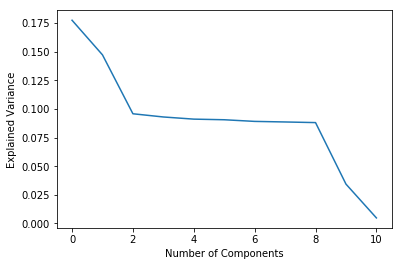

In [85]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

In [86]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'], index=numeric_col.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Age,0.083022,0.700961,0.023092,-0.023848,-0.013967,0.005668,-0.016475,0.020133,-0.014014,-0.706604,-0.016403
Income,-0.007381,-0.007299,0.125342,0.628344,0.142553,-0.406435,-0.419975,0.476708,-0.012875,-0.007638,-0.001209
VitD_levels,0.540348,-0.052820,-0.290070,0.268497,-0.007116,0.101935,0.443798,0.210194,-0.028199,-0.022924,0.544153
Initial_days,0.446459,-0.073502,0.315195,-0.316930,0.017248,-0.116691,-0.559115,-0.255045,0.017399,-0.005789,0.451189
TotalCharge,0.702186,-0.078247,-0.023226,0.002934,0.003123,0.004971,-0.015486,-0.000234,-0.013130,0.021019,-0.706665
Additional_charges,0.083632,0.701292,0.024413,-0.002906,0.002492,0.009810,-0.008102,0.021354,0.001529,0.706608,0.025875
Population_Within_One_Mile,0.020635,-0.027016,0.507703,0.019521,0.127053,0.520628,0.062713,0.317589,0.590414,-0.010862,-0.001658
Children,0.000265,0.011000,0.108862,-0.017978,0.943463,-0.050475,0.182547,-0.174035,-0.176998,-0.009610,-0.001733
Doc_visits,-0.005246,0.012789,0.174886,0.618541,-0.108576,0.451669,-0.112492,-0.549221,-0.237712,-0.005627,-0.000215
Full_meals_eaten,-0.009217,0.036709,-0.562199,0.151448,0.177056,-0.044917,-0.230580,-0.327489,0.682414,-0.009467,-0.001450


## PCA Summary

### From our Scree Plot, We can see that our most important components are 'PC1' with about 15% of the variance explaned by it, 'PC2' with about 9%, and 'PC3' also with about 9%, 'PC3' with about 9%,  'PC4' with about 9%, 'PC5' with about 9%, 'PC6' with about 9%, 'PC7' with about 9%, 'PC8' with about 9%, We can also see that the features that make up each of these components with our next cell and the 'loadings' table. We see the following:

####            PC1's most impactful features are 'TotalCharge', 'VitD_levels' and 'Initial_days'
####            PC2's most impactful features are 'Additional_charges' and 'Age'
####            PC3's most impactful features are 'Full_meals_eaten', 'Population_Within_One_Mile' and 'VitD_supp'
####            PC4's most impactful features are 'Income', 'Doc_visits' 
####            PC5's most impactful feature is 'Children'
####            PC6's most impactful features are 'Vitd_supp', 'Population_Within_One_Mile', 'Doc_visits', and 'VitD_levels'
####            PC7's most impactful features are 'Initial_days', 'VitD_supp', 'Vitd_levels, and 'Income
####            PC8's most impactful features are 'Doc_visits', 'Income'

### The remaining components explain so little of our overall variance that they are probably not worth examining further.

### We can see how impactful each feature is by how close its absolute value is to 1, this indicates how strong its effect is on the component. We can benefit from this PCA by using some of these components in place of the columns that make them up. This helps us by reducing the number of features we have to deal with while letting us keep nearly the same accuracy. The downside is that we will also lose some information since we are grouping related columns together.